## 02 - Finding the peak

The `data/pupos` contains a noisy timeseries data.

- Let's fit the sum of two Gaussians to this curve! $$ f_{2G}(x)=A_1 \mathrm{e}^{-(x-e_1)^2/s_1^2}+A_2 \mathrm{e}^{-(x-e_2)^2/s_2^2} $$

- Then let's fit the sum of two Lorentzian to this curve! $$ f_{2L}(x)=\frac{B_1}{w_1^2+(x-p_1)^2}+\frac{B_2}{w_2^2+(x-p_2)^2} $$

Plot the original curve, and in both cases the result of fittings! We might run into problems when doing the fit, in this case try to estimate initial parameters for the fit.


In [3]:
%matplotlib inline
from scipy.optimize import curve_fit
from ipywidgets import *

In [6]:
import os
# If working in vscode, you can use the following command to change the working directory
# os.chdir('/v/wfct0p/data-ex-vis/Lectures/Timeseries')

In [7]:
t,dat=loadtxt('data/pupos',unpack=True)

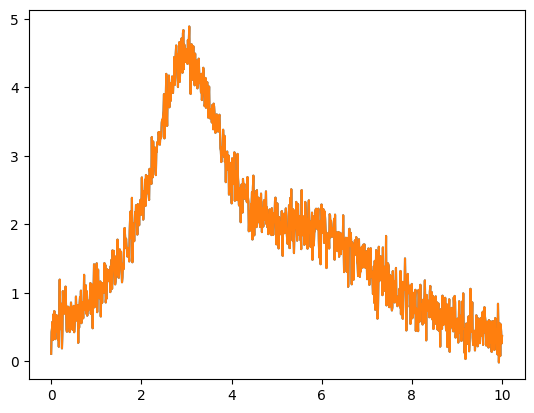

In [9]:
plot(t,dat)
show()

It seems that we have two peaks on this curve. Try to fit the Gaussians first without guessing the parameters! 

In [10]:
# Function to fit
def gauss(x,A1,e1,s1,A2,e2,s2):
    return A1*exp(-(x-e1)**2/s1**2)+A2*exp(-(x-e2)**2/s2**2)

In [11]:
pgauss,pcov=curve_fit(gauss,t,dat)#,p0=[4.5,3,1,2,5,2])
print(pgauss)
print(diag(abs(pcov)))


[2.12127815 4.49313517 3.90120813 2.59523972 2.95434579 0.89991893]
[3.77696658e-04 7.41745477e-04 1.09424319e-03 9.01277686e-04
 5.89657224e-05 1.73710812e-04]


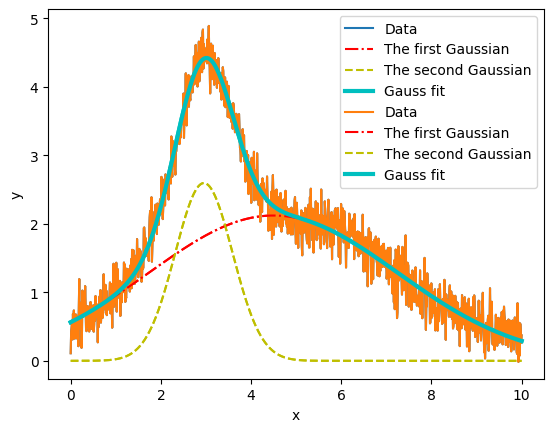

In [13]:
A1,e1,s1,A2,e2,s2=pgauss
plot(t,dat,label='Data')
plot(t,A1*exp(-(t-e1)**2/s1**2),'r-.',label='The first Gaussian ')
plot(t,A2*exp(-(t-e2)**2/s2**2),'y--',label='The second Gaussian')
plot(t,gauss(t,*pgauss),'c-',label='Gauss fit',lw=3)
legend()
xlabel('x')
ylabel('y')
grid()
show()


That does not really look like an acceptable fit at all!. Let's try to estimate the parameters now! 
The first peak seems to be centered around $3.0$ with a height and width of $4.5$, $1.0$ and the other is around $5.0$ with a height of $2.0$ and width of $2.0$. 
Try to use these numbers as initial parameters!


In [14]:
pgauss,pcov=curve_fit(gauss,t,dat, p0=[4.5,3,1,2,5,2])
print(pgauss)
print(diag(abs(pcov)))


[2.59523974 2.95434566 0.89991941 2.12127781 4.49313576 3.90120803]
[9.01278441e-04 5.89661312e-05 1.73712416e-04 3.77697521e-04
 7.41753483e-04 1.09424155e-03]


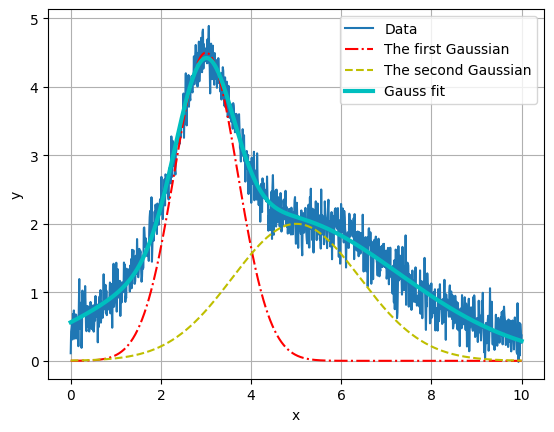

In [15]:
A1,e1,s1,A2,e2,s2=[4.5,3,1,2,5,2]
plot(t,dat,label='Data')
plot(t,A1*exp(-(t-e1)**2/s1**2),'r-.',label='The first Gaussian ')
plot(t,A2*exp(-(t-e2)**2/s2**2),'y--',label='The second Gaussian')
plot(t,gauss(t,*pgauss),'c-',label='Gauss fit',lw=3)
legend()
xlabel('x')
ylabel('y')
grid()
show()

Okay, that looks much better! Estimating the parameters was worth the effort.

Next try to fit the Lorentzians! First again without guessing the parameters.


In [16]:
# Function to fit
def lorentz(x,B1,p1,w1,B2,p2,w2):
    return B1/(w1**2+(x-p1)**2)+B2/(w2**2+(x-p2)**2)

In [17]:
plorentz,pcov=curve_fit(lorentz,t,dat)
print(plorentz)
print(diag(abs(pcov)))

[6.09670103 5.91584324 1.99283216 3.82635771 2.99563713 0.97919737]
[1.19564968e-01 1.54782717e-03 3.14599727e-03 1.36354132e-02
 5.29217178e-05 1.94384765e-04]


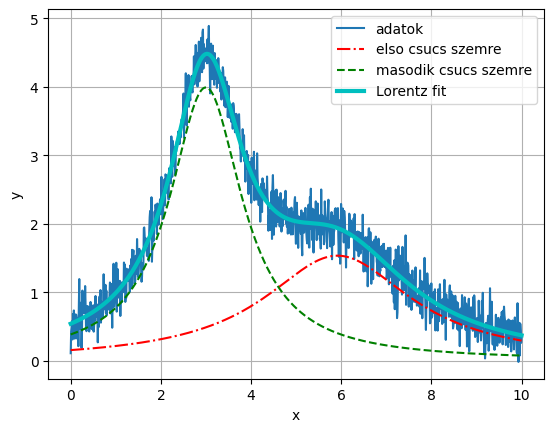

In [18]:
B1,p1,w1,B2,p2,w2=plorentz#[4.5,3,1,2,5,2]
plot(t,dat,label='adatok')
plot(t,B1/(w1**2+(t-p1)**2),'r-.',label='elso csucs szemre')
plot(t,B2/(w2**2+(t-p2)**2),'g--',label='masodik csucs szemre')
plot(t,lorentz(t,*plorentz),'c-',label='Lorentz fit',lw=3)
legend()
xlabel('x')
ylabel('y')
grid()
show()

Is this a good fit? Not that bad as with the Gaussians, but it could be better. We can try to play with/adjust the parameters a bit

In [19]:
# Let's create a function, that creates the plot and uses or fitting parameters as input
def plot_Lorentzians(B1=plorentz[0], p1=plorentz[1], w1=plorentz[2], B2=plorentz[3], p2=plorentz[4], w2=plorentz[5]):
    figsize(10,8)
    plot(t,dat,label='adatok')
    plot(t,B1/(w1**2+(t-p1)**2),'r-.',label='elso csucs szemre')
    plot(t,B2/(w2**2+(t-p2)**2),'g--',label='masodik csucs szemre')
    plot(t,lorentz(t,*plorentz),'c-',label='Lorentz fit',lw=3)
    legend()
    xlabel('x')
    ylabel('y')
    grid();

In [21]:
# This is the function from the ipywidgets modul, let's us interact with the input parameters
# Observe that the parameters are not independent of each other!
interact(plot_Lorentzians);

interactive(children=(FloatSlider(value=6.096701032840393, description='B1', max=18.29010309852118, min=-6.096…

Now do the fitting with some manually adjusted parameters!

In [22]:
plorentz,pcov=curve_fit(lorentz,t,dat,p0=[4.5,3,1,2,5,2])
print(plorentz)
print(diag(abs(pcov)))

[3.82637038 2.99563808 0.97919877 6.09666861 5.91584742 1.9928277 ]
[1.36349769e-02 5.29227373e-05 1.94367173e-04 1.19518454e-01
 1.54741088e-03 3.14553141e-03]


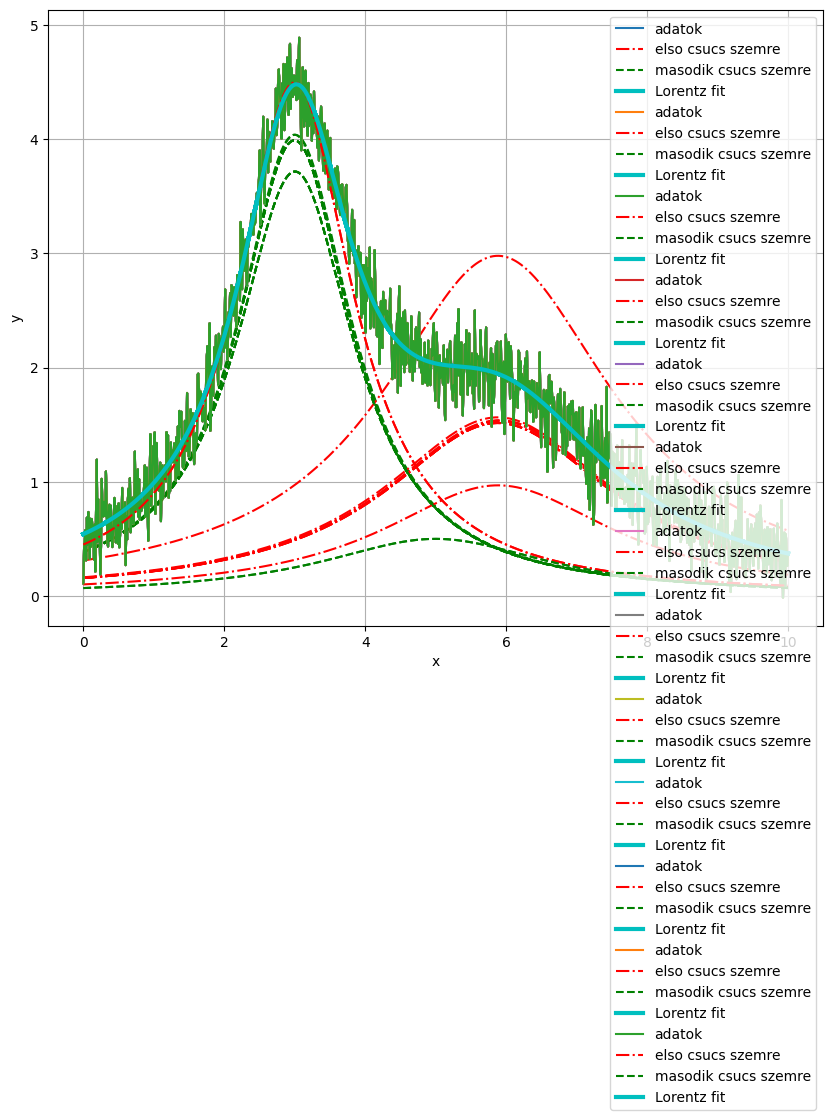

In [24]:
B1,p1,w1,B2,p2,w2=[4.5,3,1,2,5,2]
plot(t,dat,label='adatok')
plot(t,B1/(w1**2+(t-p1)**2),'r-.',label='elso csucs szemre')
plot(t,B2/(w2**2+(t-p2)**2),'g--',label='masodik csucs szemre')
plot(t,lorentz(t,*plorentz),'c-',label='Lorentz fit',lw=3)
legend()
xlabel('x')
ylabel('y')
grid()
show()